<a href="https://colab.research.google.com/github/Siddarth070/NetfixReccomedaionSystem/blob/main/NetflixRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.26

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


* header = None -> Treats all rows as data (does not assume the first row is a header)
* names=["Cust_ID", "Ratings"] -> Renames the columns for clarity
* usecols = [0,1] -> Keep only the first two columns (ignore extra columns like in our data i am having date column)

In [3]:
netflix_dataset = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt/combined_data_1.txt',header=None,names=["Cust_ID","Ratings"],usecols=[0,1])

In [4]:
netflix_dataset

,Cust_ID,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


we will get the count of movies with the help of customer id and ratings column

In [5]:
movie_count  = netflix_dataset.isnull().sum()
movie_count  = movie_count["Ratings"]
movie_count

4499

In [6]:
total_count = netflix_dataset['Cust_ID'].nunique()
total_count

475257

In [7]:
customer_count = total_count - movie_count
customer_count

470758

In [8]:
ratings_count = netflix_dataset['Cust_ID'].count() - movie_count
ratings_count

24053764

To find how many users have rated the movies 1-5 stars


In [9]:
netflix_dataset.Ratings.value_counts().sort_index()

,count
Ratings,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [10]:
stars = netflix_dataset.groupby('Ratings')['Ratings'].agg(['count'])

In [11]:
stars


,count
Ratings,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


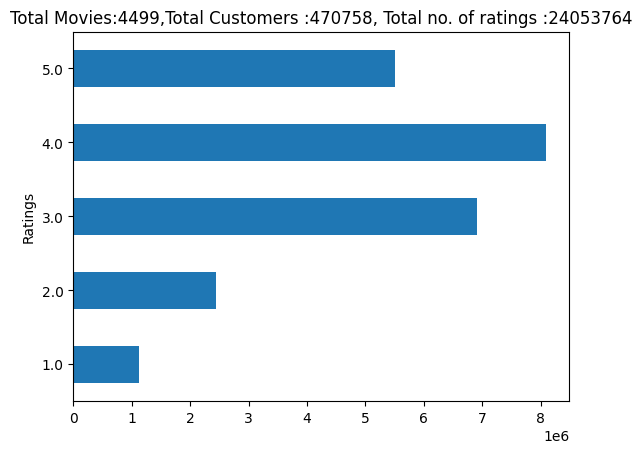

In [12]:
stars.plot(kind='barh' ,legend = False)
plt.title(f'Total Movies:{movie_count},Total Customers :{customer_count}, Total no. of ratings :{ratings_count}')
plt.show()

*Lets make a clear dataframe to see how many movie id are there*

In [13]:
from os import replace
movie_id = None
movie_no = [] #empty list to store all movie ID
for i in netflix_dataset['Cust_ID']:
  if ':' in i:
    movie_id = int(i.replace(':',''))

  movie_no.append(movie_id)

In [14]:
len(movie_no)

24058263

Now we will create new column dataset to store movie ID

In [15]:
netflix_dataset['Movie_ID'] = movie_no


In [16]:
netflix_dataset

,Cust_ID,Ratings,Movie_ID
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


WE will keep only the rows where the ratings column is not null

In [17]:
netflix_dataset = netflix_dataset[netflix_dataset['Ratings'].notna()]


In [18]:
netflix_dataset

,Cust_ID,Ratings,Movie_ID
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [19]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_ID   object 
 1   Ratings   float64
 2   Movie_ID  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [20]:
netflix_dataset['Cust_ID'] = netflix_dataset['Cust_ID'].astype(int)

/tmp/ipython-input-1858738989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_ID'] = netflix_dataset['Cust_ID'].astype(int)


In [21]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_ID   int64  
 1   Ratings   float64
 2   Movie_ID  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


###**Now we will do Pre-filtering**
* we will remove all the users that have rated less movies
* we will remove all the movies that have been rated less

Count the rating of movie id


In [22]:
dataset_movie_summary = netflix_dataset.groupby('Movie_ID')['Ratings'].agg(['count'])
dataset_movie_summary

,count
Movie_ID,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


**We will create a Benchmark(we will consider a benchmark value of 60 percentile)**

In [23]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

This bench mark tell us that movie with atleast 908 ratings are in the 60% most top rated movies?

It helps us to filter out unpopular movies

**Any movie is having ratings less than 908 , we will exclude that movie**

In [24]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_ID', length=2699)

we will remove all the user that have rated less movies

In [25]:
dataset_cust_summary = netflix_dataset.groupby('Cust_ID')['Ratings'].agg(['count'])
dataset_cust_summary

,count
Cust_ID,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [26]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [27]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_ID', length=282042)

~(tilded) symbol is the negation in pandas

it inverts the conditons:
* isin(drop_movie_list) -> select the movie in the list
* ~isin(drop_movie_list) -> select the movie that is not in the list


In [28]:
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_ID'].isin(drop_cust_list)]
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_ID'].isin(drop_movie_list)]

In [29]:
netflix_dataset

,Cust_ID,Ratings,Movie_ID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


#**Model Building process**

**we will load the second dataset as with the previous data we only had movie id**

In [64]:
df_title = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt/movie_titles.csv',encoding= 'ISO 8859-1' , usecols=[0,1,2]
                       ,header=None ,names=['Movie_ID','Year', 'Name'])

In [65]:
df_title

,Movie_ID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


To implement SVD we will use Surprise library

In [32]:
!pip install scikit-surprise

In [33]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

* Reader -> It helps us to define the format fo the rating data(eg. Rating scale)
* dataset -> It converts raw data into format that is suitable for the surprise library
* SVD -> It is a matrix factorization algorithm that we are using for recommendation

**How my recommendation is going to work**

* Reader will define how rating are structured (1-5)
* Dataset will load the data into format
* SVD will give recommendation
* cross-validate will check how well the  model predicts the rating on unseen  data

In [66]:
reader = Reader()

In [67]:
netflix_dataset.columns

Index(['Cust_ID', 'Ratings', 'Movie_ID'], dtype='object')

In [68]:
data = Dataset.load_from_df(netflix_dataset[['Cust_ID','Movie_ID','Ratings']][:100000],reader)

In [69]:
display(data)

In [70]:
model = SVD()

In [71]:
cross_validate(model,data,measures=['RMSE'],cv = 3 ,verbose=2 )

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0222  1.0143  1.0216  1.0194  0.0036  
Fit time          2.18    1.41    1.41    1.67    0.36    
Test time         0.29    0.43    0.45    0.39    0.07    


{'test_rmse': array([1.02224725, 1.01432412, 1.02159393]),
 'fit_time': (2.1827921867370605, 1.4110527038574219, 1.4074463844299316),
 'test_time': (0.29485249519348145, 0.43279480934143066, 0.45154857635498047)}

In [72]:
netflix_dataset

,Cust_ID,Ratings,Movie_ID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


**Recommendations**


In [73]:
#1331154

user_rating = netflix_dataset[netflix_dataset['Cust_ID']==1331154]
user_rating

,Cust_ID,Ratings,Movie_ID
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


* This 1331154 user rated 253 movies

In [74]:
# we are making copy of each individual customer for Recommendation

user_1331154 = df_title.copy()
user_1331154

,Movie_ID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [76]:
# we will remove the less dated movie from the second dataset

user_1331154 = user_1331154[~user_1331154['Movie_ID'].isin(drop_movie_list)]

In [77]:
user_1331154

,Movie_ID,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


**Prediction part**

`.est`

In [99]:
user_1331154['Estimated_Score'] = user_1331154['Movie_ID'].apply(lambda x: model.predict(1331154,x).est)

In [100]:
# Now we will display top 5 movies that was recommended to 1331154

user_1331154.sort_values('Estimated_Score',ascending= False, inplace=True)

In [101]:
user_1331154.head(5)

,Movie_ID,Year,Name,Estimate_Score,Estimated_Score
2,3,1997.0,Character,4.080496,4.080496
4,5,2004.0,The Rise and Fall of ECW,3.996619,3.996619
17,18,1994.0,Immortal Beloved,3.978073,3.978073
27,28,2002.0,Lilo and Stitch,3.954992,3.954992
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.951635,3.951635
